Pada FInal project 2 kali ini adalah membangun model Logistic Regression dan SVM dengan menggunakan data weatherAUS, dataset ini memiliki 23 atribut dengan data hujan harian selama 10 tahun di Australia. Terdapat kolom RainTomorrow yang akan dijadikan target variable yang akan di prediksi. Jika 'Yes' maka besok akan hujan, jika 'no' berarti besok tidak akan hujan

### Import Modul

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data Loading

membaca dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')

menampilkan 5 data teratas pada dataset

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


features pada dataset

In [4]:
df.axes

[RangeIndex(start=0, stop=145460, step=1),
 Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
        'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
        'Temp3pm', 'RainToday', 'RainTomorrow'],
       dtype='object')]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

menampilkan statistik pada dataset

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Data Cleaning

Cek missing values yang terdapat pada setiap kolom

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

mengisi missing values dengan mean di setiap kolomnnya

In [3]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#### Explore data kategorikal

Pada dataset terdapat kolom yang bennilai kategorikal

In [4]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [10]:
categorical.isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Hasil diatas menunjukan missing value pada setial kolom, kemudian akan dilakaukan data cleaning dengan mengisi nilai missing value denga modus (mode)

In [5]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [12]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

karena tidak terlalu diperlukan dalam modeling, maka saya akan menghapus menghapus kolom 'Date'

In [6]:
df = df.drop('Date', axis=1)

mengganti nama kolom 'Location' dengan 'City"

In [7]:
df.rename(columns={'Location':'City'}, inplace=True)

In [15]:
df.head(2)

,City,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No


### Eksplorasi Data

Dari hasil visualisasi untuk kolom 'RainTomorrow' yang akan dijadikan sebagai target modeling data yang saya miliki inbalence artinya tidak seimbang antara nilai 'No' dan 'Yes'. Untuk modeling nanti karena datanya innbalence makan metriks accuracy tidak bisa digunakan sebagai acuan apakah model yang sudah dibuat bagus atau tidak

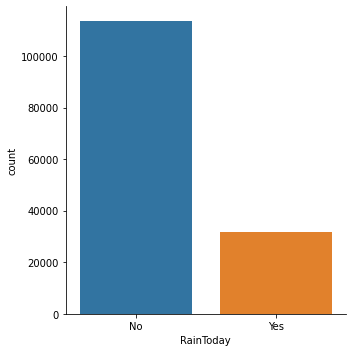

In [16]:
sns.catplot(x = 'RainToday', kind = 'count', data = df)

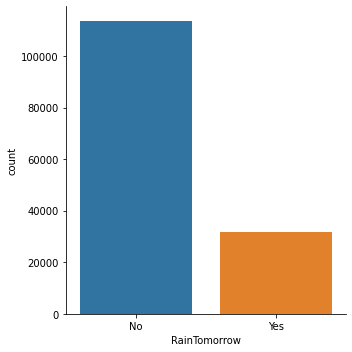

In [17]:
sns.catplot(x = 'RainTomorrow', kind='count', data = df)

Berikut adalah hubungan anntara kolom 'MinTemp' dan 'Maxtemp' terhadap kolom 'RainTomorrow'

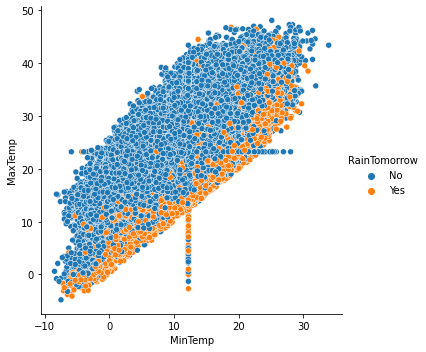

In [18]:
sns.relplot(x='MinTemp', y='MaxTemp', hue = 'RainTomorrow', data = df)

Visualisasi hubungan kolom 'sunshine' dan 'MaxTemp' terhadapa kolom 'RainToday' dan 'RainTomorrow'

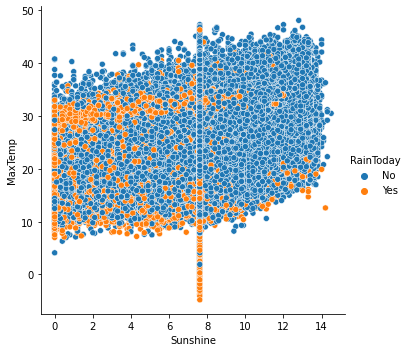

In [19]:
sns.relplot(x = 'Sunshine', y ='MaxTemp', hue = 'RainToday', data = df)

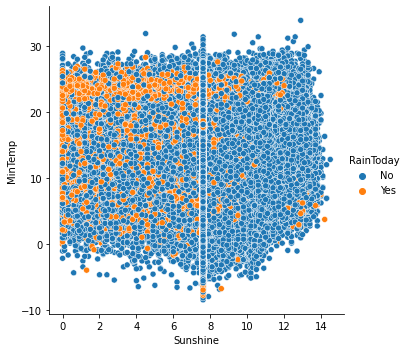

In [20]:
sns.relplot(x = 'Sunshine', y = 'MinTemp', hue = 'RainToday', data = df)

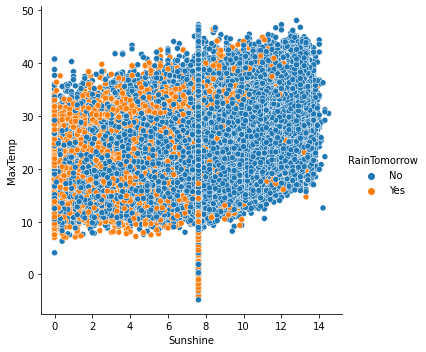

In [21]:
sns.relplot(x = 'Sunshine', y = 'MaxTemp', hue = 'RainTomorrow', data = df)


Visualisi rata-rata maksimal temperatur pada setiap kota, dihasilkan bahwa kota katherine memiliki rata-rata suhu paling tinggi dibanding kota lain

In [22]:
city = df['MaxTemp'].groupby(df['City'], axis=0).mean().sort_values()


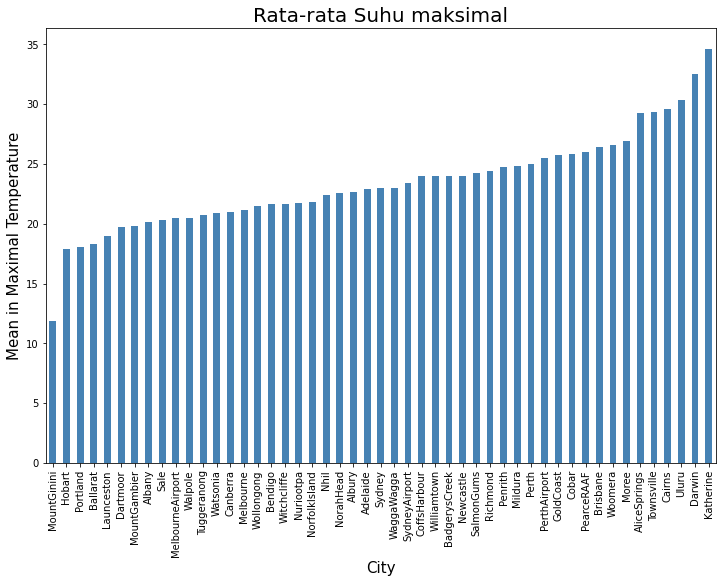

In [23]:
city.plot(kind='bar', figsize=(12,8), color = 'steelblue')
plt.title('Rata-rata Suhu maksimal', fontsize=20)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Mean in Maximal Temperature', fontsize = 15)
plt.show()

array([[<AxesSubplot:title={'center':'MaxTemp'}>]], dtype=object)

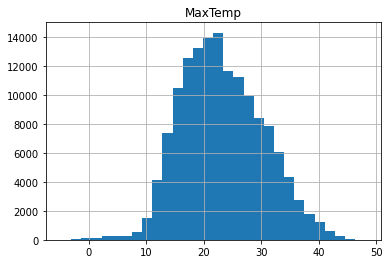

In [38]:
df.hist(column='MaxTemp',bins=30)

array([[<AxesSubplot:title={'center':'MinTemp'}>]], dtype=object)

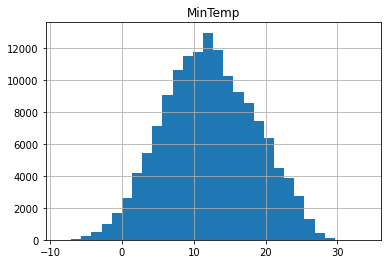

In [39]:
df.hist(column='MinTemp', bins=30)

### Data Prepropcessing

Sebelum dilakukan modeling, saya akan encoding terlebih dahulu feature dalam data, untuk mengubah data kategorikal mejadi numerikal

In [8]:
df1 = df.iloc[:, 0:21]

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_new_encode = df1.copy()
for col in df_new_encode.select_dtypes(include='O').columns:
    df_new_encode[col] = le.fit_transform(df_new_encode[col])

In [26]:
df_new_encode.head()

,City,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0


In [27]:
df_new_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

#### StandarScaler

saya melakukan penskalaan pada setiap feature 

In [10]:
X = df_new_encode.iloc[:, 0:21]
y = df['RainTomorrow']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Standar = scaler.fit_transform(X)

In [12]:
X_Standar[0]

array([-1.53166617e+00,  1.89446615e-01, -4.53363105e-02, -2.10071794e-01,
       -2.80933081e-16, -6.50805007e-16,  1.04522847e+00,  3.02234118e-01,
        1.32876628e+00,  1.36645776e+00,  6.72221523e-01,  6.12322831e-01,
        1.12394715e-01, -1.44296537e+00, -1.47878770e+00, -1.22388211e+00,
        1.56803670e+00, -8.48734694e-16, -1.40531282e-02,  1.70232282e-02,
       -5.29795450e-01])

### Pelatihan Model

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_Standar,y, test_size = 0.3, random_state=0)

In [14]:
print(X_train.shape, y_train.shape)

(101822, 21) (101822,)


In [33]:
print(X_test.shape, y_test.shape)

(43638, 21) (43638,)


### Logistic Regression

Logistik regression digunakan pada kasus klasifikasi seperti pada dataset ini, yang mempredikasi apakah besok akan hujan atau tidak dengan nilai yes atau no

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [16]:
pred_Xtest = model.predict(X_test)
pred_Xtest 

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, pred_Xtest))
matrix = confusion_matrix(y_test, pred_Xtest)
print(matrix)

0.8434621201704936
[[32315  1783]
 [ 5048  4492]]


karena accuracy score tidak tepat digunakan dalam acuan bagus atau tidak nya model dalam kasus data inbalance, maka saya menggunakan metrik f1 score

In [18]:
print(classification_report(y_test, pred_Xtest))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     34098
         Yes       0.72      0.47      0.57      9540

    accuracy                           0.84     43638
   macro avg       0.79      0.71      0.74     43638
weighted avg       0.83      0.84      0.83     43638



In [37]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_Xtest, average = 'weighted')

0.8308795806479903

### SVM

In [29]:
from sklearn.svm import SVC

In [31]:
svm = SVC(kernel = 'linear', random_state=1, C = 1.0)

In [32]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [33]:
pred = svm.predict(X_test)
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [42]:
accuracy_score(y_test, pred)

0.8417434346212017

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.86      0.96      0.90     34098
         Yes       0.73      0.44      0.55      9540

    accuracy                           0.84     43638
   macro avg       0.80      0.70      0.73     43638
weighted avg       0.83      0.84      0.83     43638



### Kesimpulan


Pada kasus data inbalance ini score accuracy bukan acuan sebagai modeling yang bagus, dengan menggunakan metrik f1-score, nilai diatas menunjukan model yang sudah bagus